## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">Import Libraries</div>

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">1. Read and Explain Dataset</div>

In [210]:
#Read input data
df = pd.read_csv('Data/loan_default_data.csv')
#print dataset
print("Input Dataset shape:",df.shape)
df.head(6)

Input Dataset shape: (233154, 41)


,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-1990,Self employed,19-09-2018,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0


<div style="background-color: #ddefdd; padding: 10px; border-radius: 10px; color: #007d3c; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">Feature Descriptions</h1>
</div>

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<ul>
    <li><b>UniqueID:</b> Identifier for customers.</li>
    <li><b>disbursed_amount:</b> Amount of Loan disbursed.</li>
    <li><b>asset_cost:</b> Cost of the Asset.</li>
    <li><b>ltv:</b> Loan to Value of the asset.</li>
    <li><b>branch_id:</b> Branch where the loan was disbursed.</li>
    <li><b>supplier_id:</b> Vehicle Dealer where the loan was disbursed.</li>
    <li><b>manufacturer_id:</b> Vehicle manufacturer (Hero, Honda, TVS etc.).</li>
    <li><b>Current_pincode:</b> Current pincode of the customer.</li>
    <li><b>Date.of.Birth:</b> Date of birth of the customer.</li>
    <li><b>Employment.Type:</b> Employment Type of the customer (Salaried/Self Employed).</li>
    <li><b>DisbursalDate:</b> Date of disbursement.</li>
    <li><b>State_ID:</b> State of disbursement.</li>
    <li><b>Employee_code_ID:</b> Employee of the organization who logged the disbursement.</li>
    <li><b>MobileNo_Avl_Flag:</b> If Mobile no. was shared by the customer then flagged as 1.</li>
    <li><b>Aadhar_flag:</b> If aadhar was shared by the customer then flagged as 1.</li>
    <li><b>PAN_flag:</b> If pan was shared by the customer then flagged as 1.</li>
    <li><b>VoterID_flag:</b> If voter ID was shared by the customer then flagged as 1.</li>
    <li><b>Driving_flag:</b> If DL was shared by the customer then flagged as 1.</li>
    <li><b>Passport_flag:</b> If passport was shared by the customer then flagged as 1.</li>
    <li><b>PERFORM_CNS.SCORE:</b> Bureau Score.</li>
    <li><b>PERFORM_CNS.SCORE.DESCRIPTION:</b> Bureau score description.</li>
    <li><b>PRI.NO.OF.ACCTS:</b> Count of total loans taken by the customer at the time of disbursement.</li>
    <li><b>PRI.ACTIVE.ACCTS:</b> Count of active loans taken by the customer at the time of disbursement.</li>
    <li><b>PRI.OVERDUE.ACCTS:</b> Count of default accounts at the time of disbursement.</li>
    <li><b>PRI.CURRENT.BALANCE:</b> Total Principal outstanding amount of the active loans at the time of disbursement.</li>
    <li><b>PRI.SANCTIONED.AMOUNT:</b> Total amount that was sanctioned for all the loans at the time of disbursement.</li>
    <li><b>PRI.DISBURSED.AMOUNT:</b> Total amount that was disbursed for all the loans at the time of disbursement.</li>
    <li><b>SEC.NO.OF.ACCTS:</b> Count of total loans taken by the customer at the time of disbursement.</li>
    <li><b>SEC.ACTIVE.ACCTS:</b> Count of active loans taken by the customer at the time of disbursement.</li>
    <li><b>SEC.OVERDUE.ACCTS:</b> Count of default accounts at the time of disbursement.</li>
    <li><b>SEC.CURRENT.BALANCE:</b> Total Principal outstanding amount of the active loans at the time of disbursement.</li>
    <li><b>SEC.SANCTIONED.AMOUNT:</b> Total amount that was sanctioned for all the loans at the time of disbursement.</li>
    <li><b>SEC.DISBURSED.AMOUNT:</b> Total amount that was disbursed for all the loans at the time of disbursement.</li>
    <li><b>PRIMARY.INSTAL.AMT:</b> EMI Amount of the primary loan.</li>
    <li><b>SEC.INSTAL.AMT:</b> EMI Amount of the secondary loan.</li>
    <li><b>NEW.ACCTS.IN.LAST.SIX.MONTHS:</b> New loans taken by the customer in the last 6 months before the disbursement.</li>
    <li><b>DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS:</b> Loans defaulted in the last 6 months.</li>
    <li><b>AVERAGE.ACCT.AGE:</b> Average loan tenure.</li>
    <li><b>CREDIT.HISTORY.LENGTH:</b> Time since first loan.</li>
    <li><b>NO.OF_INQUIRIES:</b> Inquiries done by the customer for loans.</li>
    <li><b>LOAN_DEFAULT:</b> Payment default in the first EMI on the due date.</li>
</ul>
</div>

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">2. Data Pre-processing & EDA</div>

In [211]:
df.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [212]:
#check null values in the dataset
null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
#calculate missing percent
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                             column name  Total missing  Percent missing
0                       EMPLOYMENT_TYPE           7661         0.032858
21        PERFORM_CNS_SCORE_DESCRIPTION              0         0.000000
23                       DISBURSAL_DATE              0         0.000000
24                           ASSET_COST              0         0.000000
25                                  LTV              0         0.000000
26                            BRANCH_ID              0         0.000000
27                          SUPPLIER_ID              0         0.000000
28                      MANUFACTURER_ID              0         0.000000
29                   CURRENT_PINCODE_ID              0         0.000000
30                        DATE_OF_BIRTH              0         0.000000
31                             STATE_ID              0         0.000000
32                    PERFORM_CNS_SCORE              0         0.000000
33                     EMPLOYEE_COD

In [213]:
# Lets check the unique columns in Employment_type
print(df.EMPLOYMENT_TYPE .unique())


['Salaried' 'Self employed' nan]


<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<b>Data Imputation for nan value in Employment_type column with Missing</b>
 </div>


In [214]:
df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].fillna("Missing")
print(df.EMPLOYMENT_TYPE .unique())


['Salaried' 'Self employed' 'Missing']


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      233154 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [216]:
print("Average loan tenure:",df['AVERAGE_ACCT_AGE'].iloc[1])
print("Credit history:",df['CREDIT_HISTORY_LENGTH'].iloc[4])



Average loan tenure: 1yrs 11mon
Credit history: 0yrs 0mon


<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<ul>
    <li>AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH:are object, but they should be float(yrs).Lets format this properly </li>
    <li>DATE_OF_BIRTH,DISBURSAL_DATE:are object,should be datetime </li>
</ul>
</div>


In [217]:
#Separate the year and month from the AVERAGE_ACCT_AGE column
df[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = df['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
df['AVERAGE_ACCT_Month'] = df['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
df["AVERAGE_ACCT_AGE"]= df["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((df["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
df= df.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month"])

#Separate the year and month from the CREDIT_HISTORY_LENGTH column
df[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = df['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
df['CREDIT_HISTORY_LENGTH_Month'] = df['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
df["CREDIT_HISTORY_LENGTH"]= df["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((df["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
df= df.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month"])


In [218]:
print("Average loan tenure:",df['AVERAGE_ACCT_AGE'].iloc[1])
print("Credit history:",df['CREDIT_HISTORY_LENGTH'].iloc[4])

Average loan tenure: 1.9166666666666665
Credit history: 0.0


In [219]:
#Convert the columns to datetime
df['DATE_OF_BIRTH'] =  pd.to_datetime(train['DATE_OF_BIRTH'], format='%d-%m-%Y')
df['DISBURSAL_DATE'] =  pd.to_datetime(train['DISBURSAL_DATE'], format='%d-%m-%Y')
print("Average loan tenure:",df['DATE_OF_BIRTH'].iloc[1])
print("Credit history:",df['DISBURSAL_DATE'].iloc[4])

Average loan tenure: 1985-07-31 00:00:00
Credit history: 2018-09-26 00:00:00


<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<b>Lets look at the class distribution of LOAN_Default which is one of our target variable </b>
 </div>

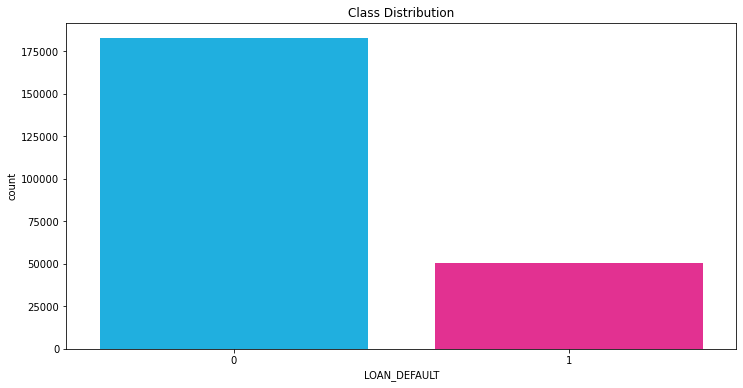

% of no defaults       : 78.29288796246257
Number of non defaults     : 182543
% of defaults         : 21.70711203753742
Number of defaults    : 50611


In [220]:
#Graph
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'LOAN_DEFAULT', data = df, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Non_Default = len(df[df['LOAN_DEFAULT']==0])
Count_Default = len(df[df['LOAN_DEFAULT']==1]) 
Non_Default_Percent = Count_Non_Default/(Count_Non_Default+Count_Default)
print('% of no defaults       :', Non_Default_Percent*100)
print('Number of non defaults     :', Count_Non_Default)
Default_Percent= Count_Default/(Count_Non_Default+Count_Default)
print('% of defaults         :',Default_Percent*100)
print('Number of defaults    :', Count_Default)

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<b>We clearly see there is class imbalance in our dataset. We can consider some methods to tackle this problem later in feature engineering.</b><br>
    <b> Lets look at some other columns which gives us more context </b>
 </div>

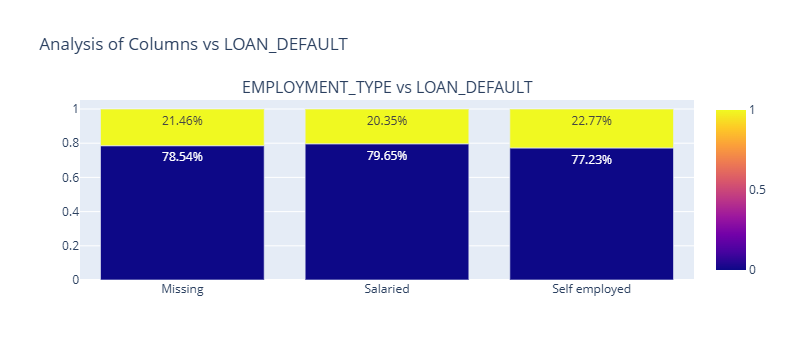

In [221]:
# List of columns to analyze
columns = ["EMPLOYMENT_TYPE"]

# Create subplots
fig = sp.make_subplots(rows=len(columns), cols=1, subplot_titles=[f"{col} vs LOAN_DEFAULT" for col in columns])

# Add each column to the subplot
for i, column in enumerate(columns, start=1):
    grouped = df.groupby([column])["LOAN_DEFAULT"].value_counts(normalize=True).reset_index(name="proportion")
    
    fig_col = px.bar(
        grouped,
        x=column,
        y="proportion",
        color="LOAN_DEFAULT",
        barmode="stack",
        text=grouped["proportion"].map(lambda x: f"{x:.2%}"),
    ).update_traces(textposition="inside")

    for trace in fig_col.data:
        fig.add_trace(trace, row=i, col=1)

# Update layout
fig.update_layout(
    height=200 * len(columns),
    title_text="Analysis of Columns vs LOAN_DEFAULT",
    showlegend=True,
    legend_title_text="LOAN_DEFAULT",
)

fig.show()


###  'DISBURSED_AMOUNT' : Amount of Loan disbursed

In [222]:
print(df.DISBURSED_AMOUNT.describe())


count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


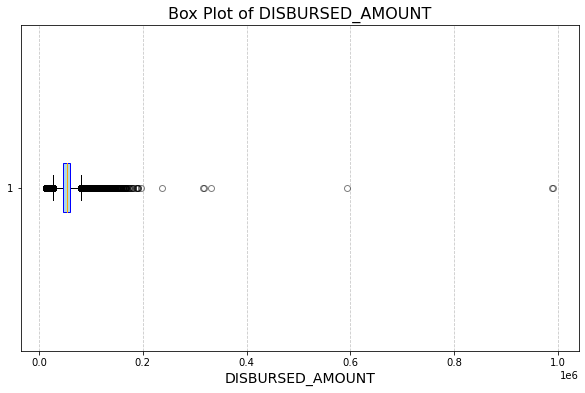

In [224]:
# Box plot to check for outliers in DISBURSED_AMOUNT
plt.figure(figsize=(10, 6))
plt.boxplot(df['DISBURSED_AMOUNT'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            flierprops=dict(marker='o', color='red', alpha=0.5),
            medianprops=dict(color='orange'))

plt.title("Box Plot of DISBURSED_AMOUNT", fontsize=16)
plt.xlabel("DISBURSED_AMOUNT", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
